## **Linear Regression with Python Scikit Learn**

In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

## Simple Linear Regression

n this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("student_scores - student_scores.csv")

In [3]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Preparing the data
The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [47]:
x = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

In [48]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [49]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

<AxesSubplot:>

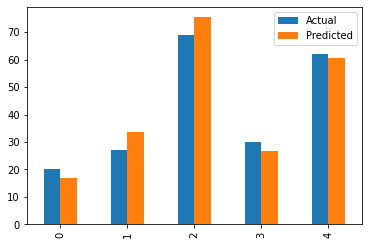

In [67]:
# Plotting the distribution of scores
df.plot(kind="bar")

 we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [50]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.2, random_state=0) 

Training the Algorithm
We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [52]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


In [68]:
regressor.coef_

array([9.91065648])

In [69]:
regressor.intercept_

2.018160041434662

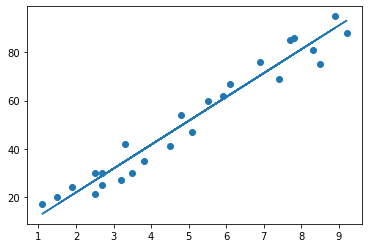

In [53]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_  # y = mx+c

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [54]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [55]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


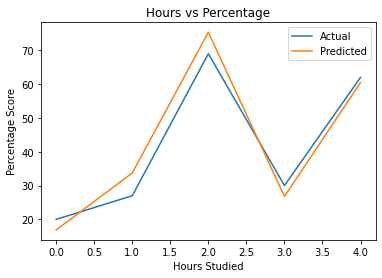

In [80]:
df.plot()
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

### Making Predictions
Now that we have trained our algorithm, it's time to make some predictions.

In [59]:
regressor.predict([[9.25]])

array([93.69173249])

## Accuracy of the model

In [63]:
regressor.score(X_test,y_test)

0.9454906892105354

## Evaluating the model
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics. 

In [81]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982
